In [21]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
%matplotlib inline
sns.set_style('darkgrid')

In [22]:
stay = []
switch = []
doors = [1,2,3]

# we will consider 100 simulations where the Harry stays to his original choice and Ron changes his choice

events = range(100)
for events in events:

    # Angel randomly randomly putting the Philossopher's stone behind door 1,2, or 3
    
    Philossopher_stone_door = np.random.randint(1,4)
    
    # random assign a guess for Harry/Ron
    
    Harry_Ron_guess = np.random.randint(1,4)
    
    # Empty doors are the doors that are not hiding the Philossopher's stone
    
    empty_doors = [door for door in doors if door != Philossopher_stone_door]
   
    # Angel reveals an empty door. Note, if the host has 2 doors to choose from,
    # it is because the Harry_Ron_guess == Philossopher_stone_door
    # If the host has only 1 door to choose from, then Harry_Ron_guess != Philossopher_stone_door
    
    possible_reveal_doors = [door for door in empty_doors if door != Harry_Ron_guess]
    if len(possible_reveal_doors) == 2:
        reveal_door = np.random.choice(possible_reveal_doors)
    else:
        reveal_door = possible_reveal_doors[0]
       
    # Define the door that the Harry/Ron would switch to
    
    switch_door = [door for door in doors if door != Harry_Ron_guess and door != reveal_door][0]

    # Let's record the results of our model over 10^2 switching or staying outcomes
    
    if Philossopher_stone_door == switch_door:
        switch.append(1)
        stay.append(0)
    else:
        switch.append(0)
        stay.append(1)

In [23]:
# Success rates

success_rate_switch = np.mean(switch)
success_rate_stay = np.mean(stay)
print(f"Success rate of Ron if Switch: {success_rate_switch : 0.2%}")
print(f"Success rate of Harry if Stay: {success_rate_stay : 0.2%}")

Success rate of Ron if Switch:  58.00%
Success rate of Harry if Stay:  42.00%


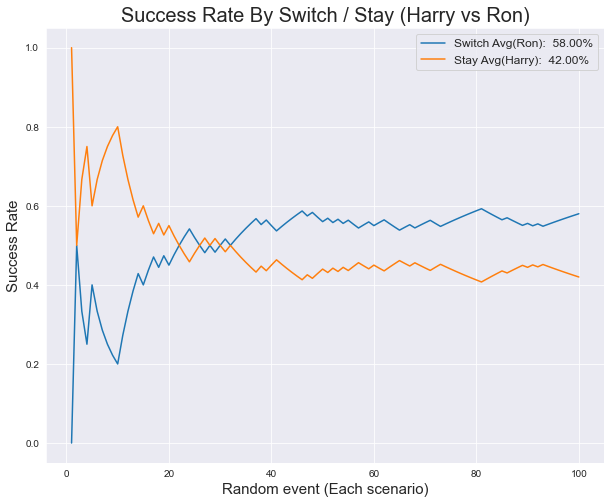

In [24]:
#Added extra feature to know how the winning rate varies with number of attempts

fig = plt.figure(figsize = (10,8));
ax = fig.add_subplot(111);

events = range(1,101)
switch_successrate = [np.mean(switch[:event]) for event in events]
stay_successrate = [np.mean(stay[:event]) for event in events]

#Plotting success rates of Harry and Ron

ax.plot(events, switch_successrate, label=f"Switch Avg(Ron): {success_rate_switch : 0.2%}");
ax.plot(events, stay_successrate, label=f"Stay Avg(Harry): {success_rate_stay : 0.2%}");

ax.set_title("Success Rate By Switch / Stay (Harry vs Ron)", {'fontsize' :  20});
ax.set_ylabel("Success Rate", {'fontsize' :  15});
ax.set_xlabel("Random event (Each scenario)", {'fontsize' :  15});

ax.legend(fontsize = 'large');